In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
# plt.style.use("science")

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import astropy.units as u
from astropy.visualization import quantity_support

variableName = os.getcwd().split('/')[-1]
variableName

'LINEAR_44914'

In [3]:
# https://astroquery.readthedocs.io/en/latest/gaia/gaia.html#login-logout
Gaia.login(credentials_file='../gaia-credentials.txt')

INFO: Login to gaia TAP server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]


In [4]:
gaiaSourceId = None
simbadResult = Simbad.query_objectids(variableName)
allIds = simbadResult['ID']
for astroId in allIds:
    if 'Gaia DR3' in astroId:
        gaiaSourceId = float(astroId.replace('Gaia DR3 ', ''))

gaiaSourceId, type(gaiaSourceId)

(9.342673008441536e+17, float)

In [9]:
os.makedirs("./data/gaia-datalink", exist_ok=True)
datalink = Gaia.load_data(ids=[int(gaiaSourceId)], data_release='Gaia DR3', data_structure='INDIVIDUAL', retrieval_type='ALL', format='votable', output_file="./data/gaia-datalink/", overwrite_output_file=True)

ERROR: Path /home/ramon/uanl/ensenada-work/PHOEBE-Ensenada-Models/LINEAR_44914/data/gaia-datalink already exist [astroquery.gaia.core]


In [6]:
list(datalink.keys())

['MCMC_MSC-Gaia DR3 934267300844153600.xml',
 'XP_SAMPLED-Gaia DR3 934267300844153600.xml',
 'XP_CONTINUOUS-Gaia DR3 934267300844153600.xml',
 'MCMC_GSPPHOT-Gaia DR3 934267300844153600.xml',
 'EPOCH_PHOTOMETRY-Gaia DR3 934267300844153600.xml']

In [7]:
sed = datalink['XP_SAMPLED-Gaia DR3 934267300844153600.xml'][0].to_table()

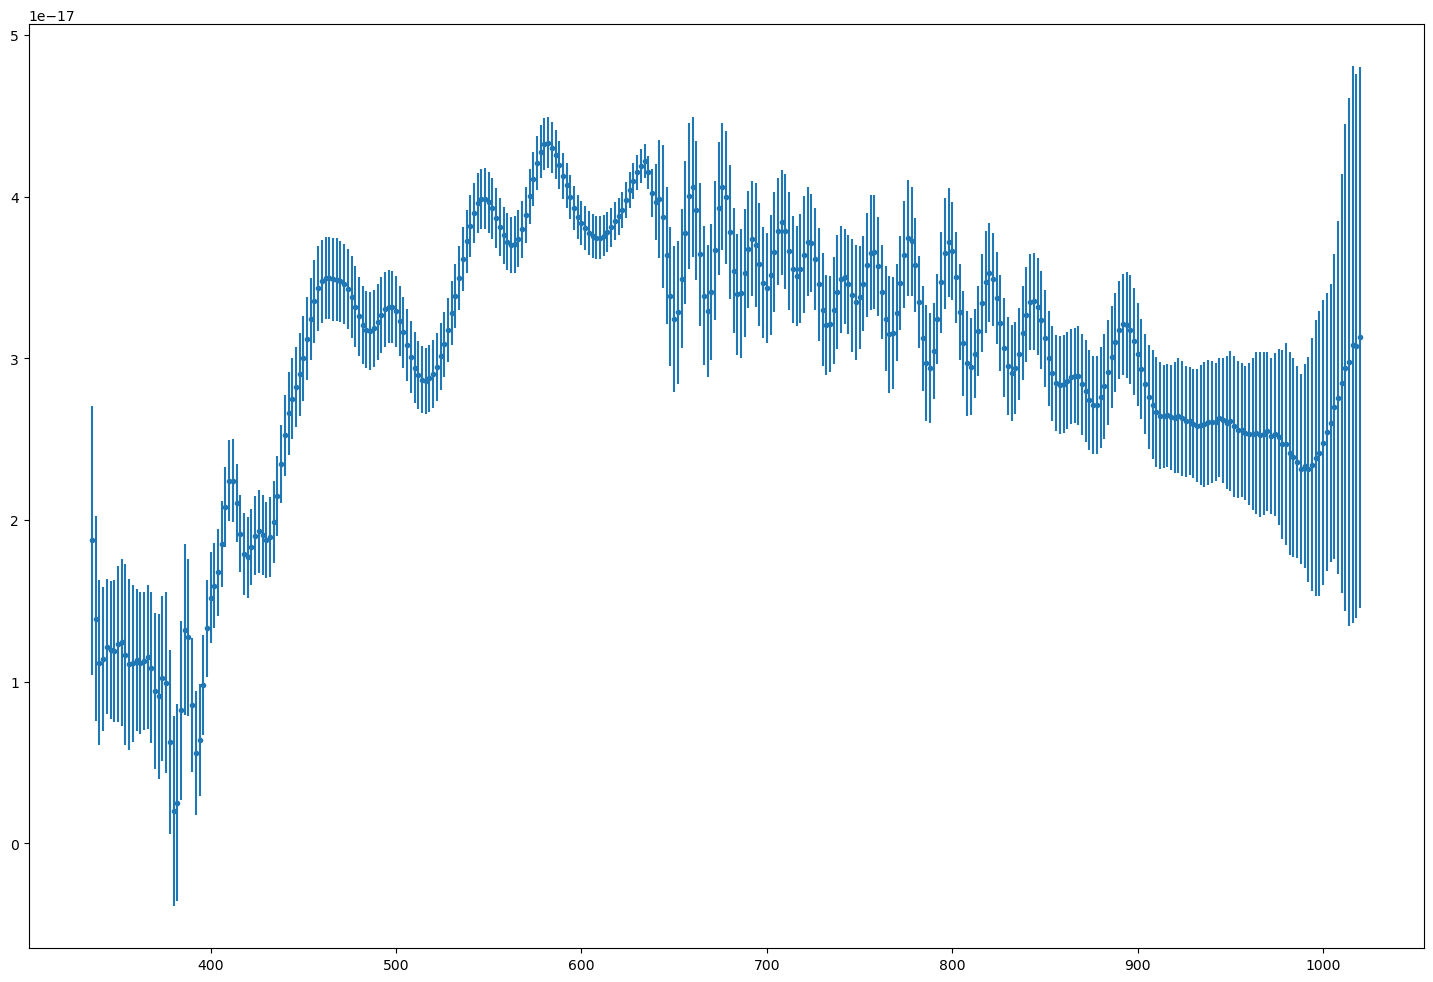

In [8]:
with quantity_support():
    plt.figure(figsize=(18, 12))
    plt.errorbar(sed['wavelength'], sed['flux'], sed['flux_error'], ls='none', marker='.')